# Customer Churn Prediction Report
## Introduction
This report presents an analysis and prediction model for customer churn in a telecom company. The goal of the project is to develop a machine learning model that can accurately predict whether a customer is likely to churn based on various features such as account length, call statistics, and plan subscriptions.

## Dataset
The dataset used for this project contains information about customers, including features such as `account length`, `area code`, `phone number`, `international plan subscription`, `voicemail plan subscription`, `call statistics (number of calls, charges)`, and `customer service calls`. The target variable is whether the customer churned or not (True/False).

## Methodology
1. Data Preparation
The dataset was loaded into a pandas DataFrame.
Multicollinear features were removed.
Exploratory Data Analysis (EDA) was conducted to understand the distribution of features and identify any patterns or trends.
2. Feature Engineering
Non-numerical features were changed to numerical (0/1) for input into the model.
3. Data Splitting
The dataset was split into training and testing sets using an 70-30 split. The split was stratified to ensure that the proportion of churned and non-churned customers was maintained in both sets.
4. Model Selection and Preprocessing
The train and test data were preprocessed using the StandardScaler library in scikit-learn.
A RandomForestClassifier model was selected for its ability to handle non-linear relationships and feature importance analysis.
5. Model Training and Evaluation
The RandomForestClassifier model was trained on the training data.
GridSearchCV was used for hyperparameter tuning to optimize model performance.
The model was evaluated on the testing data using metrics such as accuracy, precision, recall, and F1-score.
Confusion matrix analysis was performed to assess the model's performance in predicting churned and non-churned customers.
A prediction probability plot to show the probability distribution for churning is presented.
6. Interpretation
Feature importances were extracted from the trained RandomForestClassifier model and were visualized using a horizontal bar plot.
## Results
The RandomForestClassifier model achieved an accuracy of 94% on the testing data.
Precision, recall, and F1-score were also computed to evaluate the model's performance.
The confusion matrix revealed that the model had good predictive performance in identifying both churned and non-churned customers.
## Conclusion
In conclusion, the developed RandomForestClassifier model demonstrates promising results in predicting customer churn based on the provided dataset. Further optimization and fine-tuning of the model could potentially improve its performance. Additionally, ongoing monitoring and updating of the model will be essential to ensure its effectiveness in real-world scenarios.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('churn1.csv')
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
df.shape

(3333, 21)

In [8]:
df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

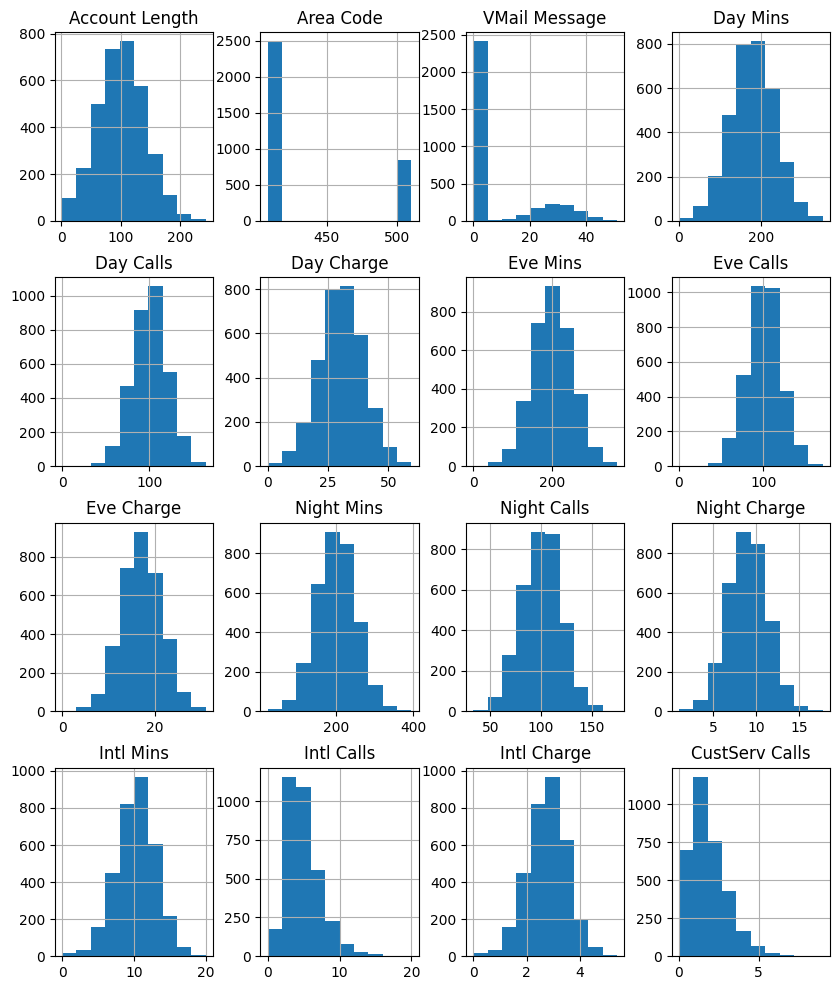

In [4]:
df.hist(figsize = (10, 12));

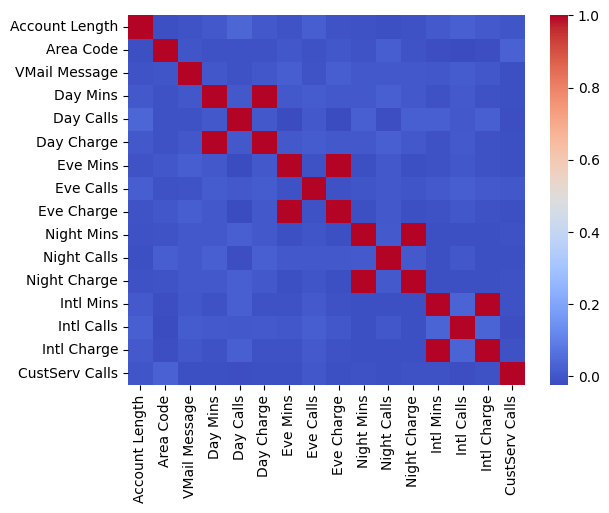

In [12]:
#Check for collinearity
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm');

* There seems to be some multicollinearity between some columns. This may be removed since they wont be necessary for making predictions.

# Churn Prediction

In [132]:
X = df_drop_mins.drop(['Churn?'], axis=1)
y = df_drop_mins['Churn?']

X = X.replace('no', 0)
X = X.replace('yes', 1)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,CustServ Calls
0,KS,128,415,382-4657,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1
1,OH,107,415,371-7191,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1
2,NJ,137,415,358-1921,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0
3,OH,84,408,375-9999,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2
4,OK,75,415,330-6626,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3


## Preprocessing

In [183]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [54]:
# Select relevant features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

In [140]:
scaler = StandardScaler()
X_num_tr = pd.DataFrame(scaler.fit_transform(X_train[numeric_features]), columns=numeric_features)
X_num_te = pd.DataFrame(scaler.fit_transform(X_test[numeric_features]), columns=numeric_features)

In [143]:
X_train_preprocessed = pd.concat([X_num_tr, X_train[["Int'l Plan", 'VMail Plan']].reset_index(drop = True)], axis=1)
X_test_preprocessed = pd.concat([X_num_te, X_test[["Int'l Plan", 'VMail Plan']].reset_index(drop = True)], axis=1)

## Model Implementation

In [144]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_preprocessed, y_train)

# Step 7: Model Evaluation
y_pred = rf_model.predict(X_test_preprocessed)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.94


# Hyperparameter Tuning

In [145]:
# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train_preprocessed, y_train)

best_model = grid_search.best_estimator_
print(best_model)

RandomForestClassifier(min_samples_split=5, random_state=42)


## Model Evaluation

In [146]:
y_pred = best_model.predict(X_test_preprocessed)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.947
Classification Report:
              precision    recall  f1-score   support

      False.       0.95      1.00      0.97       857
       True.       0.96      0.66      0.78       143

    accuracy                           0.95      1000
   macro avg       0.95      0.83      0.87      1000
weighted avg       0.95      0.95      0.94      1000

Confusion Matrix:
[[853   4]
 [ 49  94]]


In [147]:
pred_prob = pd.DataFrame(best_model.predict_proba(X_test_preprocessed), columns=rf_model.classes_)
pred_prob = pd.concat([y_test.reset_index(drop=True), pred_prob], axis=1)

Text(0, 0.5, 'Predicted to not Churn?')

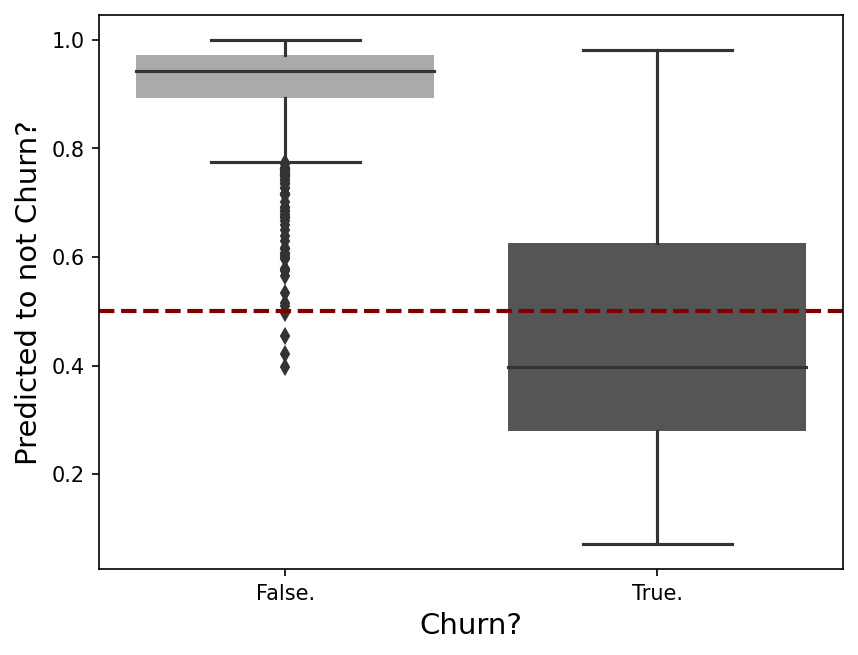

In [148]:
plt.figure(dpi = 150)
#sns.set_style(rc= {'patch.edgecolor': 'None'})
sns.boxplot(
    x = 'Churn?',
    y = 'False.',
    data = pred_prob,
    linewidth = 1.5,
    **{
    'boxprops':{'edgecolor':'None'},
    #'medianprops':{'color':'green'},
    #'whiskerprops':{'color':'blue'},
    #'capprops':{'color':'magenta'}
},
palette = 'binary'
)
plt.axhline(0.5, color = 'maroon', ls = '--', lw = 2)
plt.xlabel('Churn?', fontsize = 14)
plt.ylabel('Predicted to not Churn?', fontsize = 14)

## Model Interpretation

Text(0.5, 1.0, 'Feature Importance for Customer Churn Analysis')

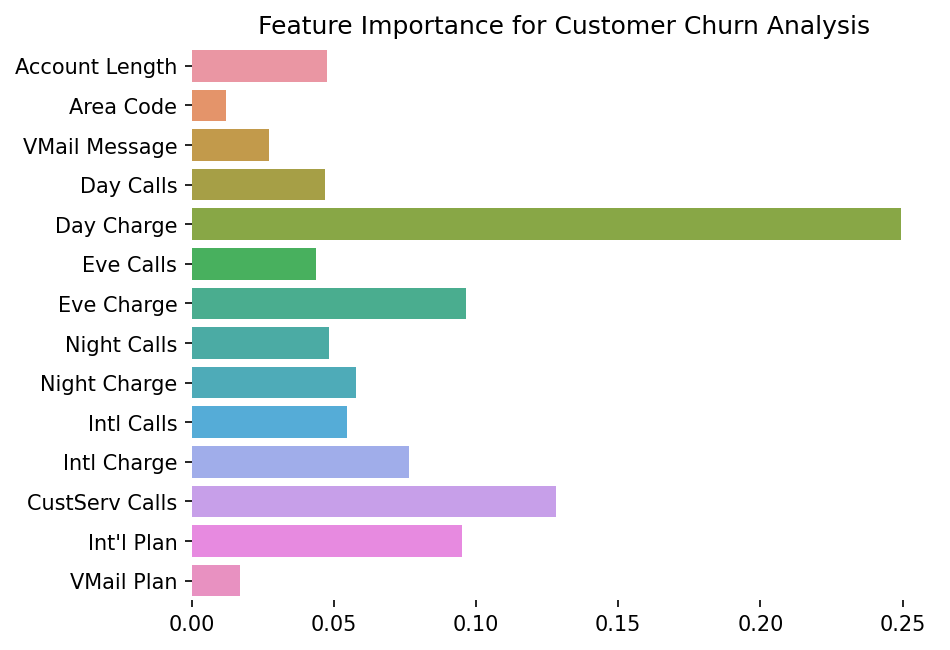

In [186]:
#Interpretation
plt.figure(dpi = 150);
sns.barplot(
    y = rf_model.feature_names_in_,
    x=best_model.feature_importances_,
    );
plt.xticks(rotation = 'horizontal', );
plt.box(False)
plt.title('Feature Importance for Customer Churn Analysis')

Based on the Random Forest model, the features that contribute the most to customer churn are `Day Charge`, `CustServ Call`, `Eve Charge`, `Int'l Plan`, and `Int'l Charge`. 